(lin-alg-notbook)=
# Elementi di algebra lineare 

In [1]:
source("../_common.R")
set.seed(42)

L'analisi fattoriale è una tecnica di analisi multivariata e, perciò, richiede la comprensione di almeno alcuni concetti di base dell'algebra lineare. A livello minimale è necessario capire che cosa sono i vettori e le matrici, che cosa è il determinante di una matrice, e in che modo possano essere eseguite le operazioni algebriche su vettori e matrici. Questo Capitolo si pone l'obiettivo di chiarire le nozioni elencate sopra.

## Vettori 

### Vettori nello spazio euclideo

Un vettore geometrico è un segmento orientato dotato di una lunghezza, una direzione e un verso. Spesso viene rappresentato con una freccia. Dato che i vettori non hanno posizione (ma solo direzione, verso e intensità), sono possibili rappresentazioni multiple dello stesso vettore. Nella discussione seguente, considereremo soltanto vettori che hanno origine nel punto (0, 0).  Questo verrà chiarito
dall'esempio seguente. La posizione di un punto nel piano può essere espressa nei termini di una coppia ordinata di numeri ($x, y$), le coordinate
di quel punto. Tale coppia di valori rappresenta la distanza verticale
dal punto a ciascuno degli assi coordinati.

Possiamo anche definire il punto $P$ specificando la distanza e la
direzione di $P$ dall'origine, ovvero nei termini del vettore
$\overrightarrow{OP}$. A sua volta, questo vettore può essere espresso
nei termini delle sue componenti nelle direzioni orizzontali e
verticali: 

$$
\overrightarrow{OP} = \left[ \begin{array}{c}
2\\
3
\end{array}
 \right]
$$ 
 
Se volessimo specificare un punto in uno spazio a 3 dimensioni, avremmo: 

$$
\overrightarrow{OP} = \left[ \begin{array}{c}
x\\
y\\
z
\end{array}
\right]
$$ 
 
In generale, un punto $P$ in uno spazio a $n$-dimensioni sarà specificato da: 

$$
\overrightarrow{OP} = \left[ \begin{array}{c}
v_1\\
v_2\\
\dots\\
v_n
\end{array}
\right]
$$ 
 
Dal punto di vista geometrico, dunque, un vettore rappresenta un punto in uno spazio $n$-dimensionale.

In $\mathsf{R}$, un vettore è definito come

In [2]:
a <- c(1, 3, 2) 
a |> print()

[1] 1 3 2


### Somma e differenza di vettori

La somma di due vettori è definita come

$$
(a_1, a_2) + (b_1, b_2) = (a_1 + b_1, a_2 + b_2).
$$

In $\mathsf{R}$ abbiamo

In [3]:
a <- c(1, 3, 2) 
b <- c(2, 8, 9) 
a + b |> print()

[1] 2 8 9


[1]  3 11 11

La differenza di due vettori è

$$
(a_1, a_2) - (b_1, b_2) = (a_1 - b_1, b_2 - b_2).
$$

In $\mathsf{R}$ abbiamo

In [4]:
a <- c(1, 3, 2) 
b <- c(2, 8, 9) 
a - b |> print()

[1] 2 8 9


[1] -1 -5 -7

### Moltiplicazione scalare

La moltiplicazione scalare di un vettore per un numero reale (o scalare) è data da 

$$
\rho (a_1, a_2) = (\rho a_1, \rho a_2)
$$ 

Dal punto di vista geometrico, la moltiplicazione scalare effettua una estensione o contrazione del vettore $\boldsymbol{a}$, preservandone la direzione.

In $\mathsf{R}$ abbiamo

In [5]:
a <- 2
x <- c(2, 8, 9) 
a * x |> print()

[1] 2 8 9


[1]  4 16 18

### Combinazione lineare

Se $\mathbf{v}_{1}, \dots, \mathbf{v}_{n}$ sono vettori e $a_1, \dots, a_n$ sono scalari, allora la combinazione lineare di questi vettori con questi coefficienti scalari è data da

$$
{\displaystyle a_{1}\mathbf {v} _{1}+a_{2}\mathbf {v} _{2}+a_{3}\mathbf {v} _{3}+\cdots +a_{n}\mathbf {v} _{n}.}
$$
Per esempio, in $\mathsf{R}$ possiamo aver

In [6]:
a <- c(2, 3, 4)
v1 <- c(2, 8, 3) 
v2 <- c(4, 5, 1) 
v3 <- c(1, 3, 2) 
y <- a[1] * v1 + a[2] * v2 + a[3] * v3
y |> print()

[1] 20 43 17


### Vettore 0 e vettore 1

Il vettore 0 è costituito da $n$ elementi, tutti uguali a 0. Il vettore 1 è costituito da $n$ elementi, tutti uguali a 1. 

In $\mathsf{R}$ abbiamo

In [7]:
x <- rep(0, 5) 
x |> print()
y <- rep(1, 5)
y |> print()

[1] 0 0 0 0 0


[1] 1 1 1 1 1


### Ortogonalità tra vettori

Due vettori si dicono ortogonali, e si scrive $\boldsymbol{a} \bot \boldsymbol{b}$, se e solo se il loro prodotto scalare è nullo:

$$
\boldsymbol{a}'\boldsymbol{b} = 0.
$$

In $\mathsf{R}$ abbiamo

In [8]:
v1 <- c(1, 1)
v2 <- c(-1, 1)
sum(v1 * v2) |> print()

[1] 0


### Trasposta di un vettore

In un vettore trasposto gli indici delle righe prendono il posto degli indici delle colonne, e viceversa.

In $\mathsf{R}$ abbiamo

In [9]:
v1 <- c(1, 3, 7) %>% 
  as.matrix()
v1 |> print()

     [,1]
[1,]    1
[2,]    3
[3,]    7


Le dimensioni di `v1` sono

In [10]:
dim(v1)

[1] 3 1

La trasposta di `v1` è

In [11]:
v2 <- t(v1)
v2 |> print()

     [,1] [,2] [,3]
[1,]    1    3    7


di dimensioni

In [12]:
dim(v2) |> print()

[1] 1 3


### Norma o lunghezza di un vettore

Per il teorema di Pitagora, la norma di un vettore $(a_1,
a_2)$ è $\sqrt{a_1^2 + a_2^2}$ ed è denotata da $\| (a_1,
a_2) \|$. Infatti, se un vettore $\boldsymbol{a}$ (l'ipotenusa) è la
somma di due vettori ortogonali $\boldsymbol{a}_1$ e $\boldsymbol{a}_2$
(i cateti), allora la lunghezza al quadrato di $\boldsymbol{a}$ è uguale
alla somma dei quadrati delle lunghezze di $\boldsymbol{a}_1$ e
$\boldsymbol{a}_2$.

Viene detta norma di $\boldsymbol{a}$ la radice del prodotto scalare di
un vettore per se stesso:

$$
\| \boldsymbol{a} \| = \sqrt{\boldsymbol{a}'\boldsymbol{a}}.
$$

In $\mathsf{R}$ abbiamo

In [13]:
sqrt(t(v1) %*% v1) |> print()

         [,1]
[1,] 7.681146


## Matrici 

Una matrice costituisce un insieme rettangolare di scalari ordinati per
riga e colonna. Può anche essere vista come la raccolta di $m$ vettori
colonna di dimensione $n$ o come la raccolta di $n$ vettori riga di
dimensione $m$. Per esempio:

$$
\boldsymbol{A} =  \left[ \begin{array}{c c c}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23} \end{array} \right]
$$

In $\mathsf{R}$ abbiamo

In [14]:
M <- matrix(
  c(1, 2, 3, 4, 5, 6), 
  ncol = 3, 
  byrow = TRUE)
M |> print()

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


### Dimensioni della matrice

I numeri interi $m$ ed $n$ si dicono dimensioni della matrice, ovvero
$\boldsymbol{A}$ si dice matrice di dimensioni $m \times n$ o di ordine
$m \times n$. Nel caso presente, la matrice $\boldsymbol{A}$ ha
dimensioni $2 \times 3$.

In [15]:
dim(M) |> print()

[1] 2 3


### Matrice trasposta

Si definisce *matrice trasposta* di $\boldsymbol{A}$, e si denota con
$\boldsymbol{A}'$ oppure $\boldsymbol{A}'$, la matrice
$\boldsymbol{B} = \boldsymbol{A}'$ di ordine $n \times m$ cui elementi
sono: 

$$
b_{ij} = a_{ji},  \quad        i = 1 \dots m, j = 1 \dots n
$$

Per esempio, 

$$
\left[ \begin{array}{c c}
-2 & 5\\
3 & 1\\
7 & -6
\end{array}
 \right]'=
\left[ \begin{array}{c c c}
-2 & 3 & 7\\
5 & 1 & -6
\end{array}
 \right]
 $$

### Matrice simmetrica

Se accade che $\boldsymbol{A} = \boldsymbol{A}'$ allora la matrice è
detta *simmetrica*.

$$
\boldsymbol{A} =  \left[ \begin{array}{c c c}
7 & 1 & 2\\
1 & 8 & 3\\
2 & 3 & 9 \end{array} \right]
$$

-   $(\boldsymbol{A} + \boldsymbol{B})' = (\boldsymbol{A})' +
    (\boldsymbol{B})'$

-   $(\boldsymbol{A} - \boldsymbol{B})' = (\boldsymbol{A})' -
    (\boldsymbol{B})'$

-   $(\boldsymbol{a} + \boldsymbol{b})' = (\boldsymbol{a})' +
    (\boldsymbol{b})'$

-   $(\boldsymbol{a} - \boldsymbol{b})' = (\boldsymbol{a})' -
    (\boldsymbol{b})'$

### Matrice quadrata o rettangolare

Se $m = n$ allora la matrice $\boldsymbol{A}$ si dice quadrata di
dimensione $n$ o di ordine $n$ altrimenti si dice rettangolare. Le righe
di $\boldsymbol{A}$ sono $[a_{11}\ a_{12}\ a_{13}]$ e $[a_{21}\ a_{22}\ a_{23}]$. Le colonne di $\boldsymbol{A}$ sono $\left[\begin{array}{c} a_{11} \\ a_{21} \end{array} \right]$, $\left[
\begin{array}{c} a_{12} \\ a_{22} \end{array} \right]$ e $\left[
\begin{array}{c} a_{13} \\ a_{23} \end{array} \right]$.

### Diagonale principale

Se $i$ e $j$ sono numeri interi con $1 \leq i \leq m$ e $1 \leq j
\leq n$ allora l'elemento della matrice $\boldsymbol{A}$ di dimensione
$m \times n$ che si trova in posizione ($i, j$) viene indicato con
$a_{ij}$. Gli elementi $a_{ij}$ di una matrice quadrata $\boldsymbol{A}$
di ordine $n$ tali che $i = j$ sono detti elementi principali o
diagonali e formano la cosiddetta *diagonale principale* di
$\boldsymbol{A}$.

$$
\boldsymbol{A} =  \left[ \begin{array}{c c c}
a_{11} & a_{12} & a_{13}\\
a_{21} &  a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33} \end{array} \right]
$$

### Matrice diagonale

Se gli elementi $a_{ij}$ di una matrice quadrata $\boldsymbol{A}$ sono
tali che $a_{ij} =0$ e $a_{ii} \neq 0$, allora la matrice
$\boldsymbol{A}$ viene detta *matrice diagonale*.

$$
\boldsymbol{A} =  \left[ \begin{array}{c c c}
a_{11} & 0 & 0\\
0 & a_{22} & 0\\
0 & 0 & a_{33} \end{array} \right]
$$

### Matrice identità

Si definisce *matrice identità* di ordine $n$ la matrice quadrata
diagonale $\boldsymbol{I}_n$ avente tutti gli elementi principali uguali
a $1$:

$$
\boldsymbol{I}_3 =  \left[ \begin{array}{c c c}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1 \end{array} \right]
$$ 

La matrice identità ha la stessa funzione del numero "1" nel sistema dei numeri reali.

### Matrici diagonali e triangolari

Gli elementi di una matrice che si trovano al di sopra della diagonale
principale sono detti *sopradiagonali*, mentre quelli che si trovano al
di sotto della stessa diagonale principale sono detti *sottodiagonali*.
Se una matrice ha tutti gli elementi sopradiagonali e sottodiagonali
uguali a zero viene detta *matrice diagonale*. Se invece ha solo gli
elementi sopradiagonali nulli allora viene detta *triangolare
inferiore*. Se ha gli elementi sottodiagonali nulli allora è detta
*triangolare superiore*.

### Somma e sottrazione

La somma e la sottrazione di due matrici sono operazioni definite
*elemento per elemento*. Per sommare due matrici sommiamo gli elementi
corrispondenti. Per sottrarre due matrici sottraiamo gli elementi
corrispondenti. Si noti che queste operazioni hanno senso solo se le due
matrici hanno *le stesse dimensioni* (altrimenti queste operazioni non
sono definite). Per esempio, 

$$
\left[ \begin{array}{c c}
-2 & 5\\
3 & 1\\
7 & -6
\end{array}
 \right]+
\left[ \begin{array}{c c}
3 & -2\\
4 & 5\\
10 & -3
\end{array}
 \right]=
 \left[ \begin{array}{c c}
1 & 3\\
7 & 6\\
17 & -9
\end{array}
 \right]
 $$


In [16]:
A <- matrix(
  c(-2, 5, 3, 1, 7, -6), nrow = 3, byrow = TRUE
)
A |> print()

     [,1] [,2]
[1,]   -2    5
[2,]    3    1
[3,]    7   -6


In [17]:
B <- matrix(
  c(3, -2, 4, 5, 10, -3), nrow = 3, byrow = TRUE
)
B |> print()

     [,1] [,2]
[1,]    3   -2
[2,]    4    5
[3,]   10   -3


In [18]:
(A + B) |> print()

     [,1] [,2]
[1,]    1    3
[2,]    7    6
[3,]   17   -9


$$
\left[ \begin{array}{c c}
-2 & 5\\
3 & 1\\
7 & -6
\end{array}
 \right]-
\left[ \begin{array}{c c}
3 & -2\\
4 & 5\\
10 & -3
\end{array}
 \right]=
 \left[ \begin{array}{c c}
-5 & 7\\
-1 & -4\\
-3 & -3
\end{array}
 \right]
 $$

In [19]:
(A - B) |> print()

     [,1] [,2]
[1,]   -5    7
[2,]   -1   -4
[3,]   -3   -3


### Moltiplicazione di scalari e matrici

L'effetto della moltiplicazione di una matrice $\boldsymbol{A}$ di
qualsiasi dimensione per un numero reale *b* (scalare) è quello di
moltiplicare ciascun elemento in $\boldsymbol{A}$ per *b*. Questo è
equivalente a sommare $\boldsymbol{A}$ a se stessa *b* volte. Per
esempio,

$$
3 \left[ \begin{array}{c c}
-2 & 5\\
3 & 1\\
7 & -6
\end{array}
 \right]=
\left[ \begin{array}{c c}
-6 & 15\\
9 & 3\\
21 & -18
\end{array}
 \right]
 $$


In [20]:
(3 * A) |> print()

     [,1] [,2]
[1,]   -6   15
[2,]    9    3
[3,]   21  -18


### Proprietà della somma e differenza

È facile verificare che la somma e la differenza cosı̀ definite godono
delle proprietà commutativa e associativa. Siano $k$ uno scalare e $A$ e
$B$ due matrici aventi le stesse dimensioni. Allora

-   $\boldsymbol{A}+ \boldsymbol{B} = \boldsymbol{B} +
    \boldsymbol{A}$(Proprietà commutativa)
-   $\boldsymbol{A} + (\boldsymbol{B} + \boldsymbol{C}) =
    (\boldsymbol{A} + \boldsymbol{B}) + \boldsymbol{C}$ (Proprietà
    associativa)
-   $k(l\boldsymbol{A}) = (kl)\boldsymbol{A}$
-   $k(\boldsymbol{A} + \boldsymbol{B}) = k\boldsymbol{A} +
    k\boldsymbol{B}$(Proprietà distributiva)
-   $(k+l)\boldsymbol{A} = k\boldsymbol{A} + l\boldsymbol{A}$
-   $1\boldsymbol{A} = \boldsymbol{A}$

### Prodotto di matrici

La moltiplicazione di matrici non è un'operazione intuitiva come la
somma e la differenza, ma fornisce uno strumento potente per eseguire
una lunga serie di calcoli in un modo molto semplice. L'ordine è
importante: il numero delle colonne della prima matrice deve essere
uguale al numero di righe della seconda matrice. Quando ciò accade le
matrici si dicono *conformabili*, altrimenti si dicono *non
conformabili*.

Sia $\boldsymbol{A}$ una matrice $m \times p$ e $\boldsymbol{B}$ una
matrice $p \times n$. Il prodotto tra le due matrici
$\boldsymbol{C} = \boldsymbol{AB}$ è la matrice di ordine $m
\times n$ il cui elemento generico è

$$
c_{ij} = \sum_{k=1}^{p} a_{ik}a_{kj},  \quad        i = 1 \dots m,
j = 1 \dots n
$$ 

Pertanto, il prodotto si effettua riga per colonna. È
facile verificare che il prodotto tra matrici gode della proprietà
associativa ma in generale non di quella commutativa. Vale invece la
seguente proprietà:

$$
(\boldsymbol{AB})' = \boldsymbol{B}'\boldsymbol{A}'
$$

Ad esempio, siano $\boldsymbol{A}$ e $\boldsymbol{B}$ le seguenti
matrici

$$
\left[ \begin{array}{c c c}
-2 & 1 & 1\\
1 & 1 & 4\\
2 & -3 & 2
\end{array}
 \right] \quad \text{e} \quad
\left[ \begin{array}{c c c}
3 & -2 &1\\
4 & 5 & 0\\
1 & -3 & 1
\end{array}
 \right]
 $$ 
 
Calcoliamo la matrice $\boldsymbol{C} = \boldsymbol{AB}$.
L'elemento $c_{ij}$ è uguale alla somma dei prodotti degli elementi
della *i*-esima riga di $\boldsymbol{A}$ per la *j*-esima colonna di
$\boldsymbol{B}$.

$c_{11} = (-2) \cdot 3 + 1 \cdot 4 + 1 \cdot 1 = -1$

$c_{12} = (-2) \cdot (-2) + 1 \cdot 5 + 1 \cdot (-3) = 6$

$c_{13} = (-2) \cdot 3 + 1 \cdot 0 + 1 \cdot 1 = -1$

$c_{21} = 1 \cdot 3 + 1 \cdot 4 + 4 \cdot 1 = 11$

$c_{22} = 1 \cdot (-2) + 1 \cdot 5 + 4 \cdot (-3) = -9$

$c_{23} = 1 \cdot 3 + 1 \cdot 0 + 4 \cdot 1 = 5$

$c_{31} = 2 \cdot 3 +(-3) \cdot 4 + 2 \cdot 1 = -4$

$c_{32} = 2 \cdot (-2) +(-3) \cdot 5 + 2 \cdot (-3) = -25$

$c_{33} = 2 \cdot 1 + (-3) \cdot 0 + 2 \cdot 1 = 4$

In definitiva 

$$
\boldsymbol{C} =  \left[ \begin{array}{c c c}
-1 & 6 & -1\\
11 & -9 & 5\\
-4 & -25 & 4
\end{array}
 \right]
 $$

In [21]:
A = matrix(
  c(-2, 1, 1, 1, 1, 4, 2, -3, 2), 
  nrow = 3,
  byrow = TRUE
)
A |> print()

     [,1] [,2] [,3]
[1,]   -2    1    1
[2,]    1    1    4
[3,]    2   -3    2


In [22]:
B = matrix(
  c(3, -2, 1, 4, 5, 0, 1, -3, 1), 
  nrow = 3,
  byrow = TRUE
)
B |> print()

     [,1] [,2] [,3]
[1,]    3   -2    1
[2,]    4    5    0
[3,]    1   -3    1


In [23]:
(A %*% B) |> print()

     [,1] [,2] [,3]
[1,]   -1    6   -1
[2,]   11   -9    5
[3,]   -4  -25    4


Calcolando il prodotto $\boldsymbol{D} = \boldsymbol{BA}$ si trova
invece: 

$$
\boldsymbol{D} =  \left[ \begin{array}{c c c}
-6 & -2 & -3\\
-3 & 9 & 24\\
-3 & -5 & -9
\end{array}
 \right]
 $$ 
 
da cui risulta evidente che $\boldsymbol{AB} \neq \boldsymbol{BA}$.

In [24]:
(B %*% A) |> print()

     [,1] [,2] [,3]
[1,]   -6   -2   -3
[2,]   -3    9   24
[3,]   -3   -5   -9


### Proprietà del prodotto di matrici

-   $\boldsymbol{A}(\boldsymbol{B} + \boldsymbol{C}) = \boldsymbol{AB} +
        \boldsymbol{AC}$
-   $(\boldsymbol{A} + \boldsymbol{B})\boldsymbol{C} = \boldsymbol{AC} +
        \boldsymbol{BC}$
-   Per qualunque matrice $\boldsymbol{A}$,
    $\boldsymbol{A}'\boldsymbol{A}$ sarà una matrice quadrata.
-   $(\boldsymbol{AB})' = \boldsymbol{B}'\boldsymbol{A}'$

### Casi particolari

La matrice identità è l'elemento neutro per il prodotto, cioè se
$\boldsymbol{I}$ è una matrice $n \times n$ si ha

$$
\boldsymbol{A} \boldsymbol{I}_n = \boldsymbol{I}_n \boldsymbol{A}
= \boldsymbol{A}.
$$ 

Per esempio, 

$$
\boldsymbol{IA} = \left(%
\begin{array}{cc}
  1 & 0 \\
  0 & 1 \\
\end{array}%
\right)
\left(%
\begin{array}{ccc}
  2 & 3 & -1 \\
  1 & 4 & 7 \\
\end{array}%
\right)=
\left(%
\begin{array}{ccc}
  2 & 3 & -1 \\
  1 & 4 & 7 \\
\end{array}%
\right)
$$

In R la matrice identità si crea nel modo seguente.

In [25]:
diag(2)

1,0
0,1


Dunque

In [26]:
A <- matrix(
  c(2, 3, -1, 1, 4, 7),
  nrow = 2, byrow = TRUE
)
A |> print()

     [,1] [,2] [,3]
[1,]    2    3   -1
[2,]    1    4    7


In [27]:
(diag(2) %*% A) |> print()

     [,1] [,2] [,3]
[1,]    2    3   -1
[2,]    1    4    7


In [28]:
(A %*% diag(3)) |> print()

     [,1] [,2] [,3]
[1,]    2    3   -1
[2,]    1    4    7


Un secondo caso particolare si verifica quando una matrice è costituita
da un'unica colonna o un'unica riga. Se la matrice $\boldsymbol{A}$ si
riduce ad una sola colonna (o una sola riga) e viene detta vettore
colonna (o riga) ad $m$ elementi o componenti. Un vettore colonna è una
matrice $n \times 1$; un vettore riga è una matrice $1 \times m$. Se
$\boldsymbol{a}$ è un vettore colonna di $m$ elementi allora
$\boldsymbol{a}'$ è un vettore riga sempre di $m$ elementi.

Per le operazioni tra vettori valgono le stesse regole viste per le
matrici, cioè la somma e la differenza sono possibili tra vettori dello
stesso tipo e con lo stesso numero di componenti. La moltiplicazione è
possibile tra una matrice e un vettore di dimensioni appropriate, e tra
due vettori di dimensioni appropriate. In questo secondo caso,
distinguiamo tra *prodotto interno* e *prodotto esterno*.

### Operazioni tra vettori

Il *prodotto interno* (o scalare) di un vettore $\boldsymbol{a}'$
$1 \times n$ che premoltiplica un vettore $\boldsymbol{b}$ $n \times 1$
produce uno scalare:

$$
\boldsymbol{a}'\boldsymbol{b} = \sum_{i=1}^{n}a_i b_i
$$

Dati due vettori $\boldsymbol{a}$, $\boldsymbol{b}$ di ordini $n
\times 1$ e $m \times 1$, il *prodotto esterno* 
$\boldsymbol{C} = \boldsymbol{ab}'$ è una matrice $n \times m$ di
elementi $c_{ij} = a_i b_j$.

### Prodotto interno

Siano $\boldsymbol{a}$ e $\boldsymbol{b}$ i seguenti vettori:

$$
\left[ \begin{array}{c}
1 \\
2 \\
3
\end{array}
 \right] \quad e \quad
\left[ \begin{array}{c}
-1 \\
-2 \\
4
\end{array}
 \right]
 $$

Il prodotto interno è:

$$
\boldsymbol{a}'\boldsymbol{b}= 1 \cdot (-1) + 2 \cdot (-2) + 3
\cdot 4 = 7
$$ 

Osserviamo che tale operazione gode della proprietà
commutativa, poichè $\boldsymbol{b}'\boldsymbol{a}=7$.

In [29]:
a <- matrix(
  c(1, 2, 3), 
  nrow = 3, 
  byrow = TRUE
)
a |> print()

     [,1]
[1,]    1
[2,]    2
[3,]    3


In [30]:
b <- matrix(
  c(-1, -2, 4), 
  nrow = 3, 
  byrow = TRUE
)
b |> print()

     [,1]
[1,]   -1
[2,]   -2
[3,]    4


In [31]:
(t(a) %*% b) |> print()

     [,1]
[1,]    7


### Prodotto esterno

Il prodotto esterno è la matrice

$$
\boldsymbol{C} = \boldsymbol{a}\boldsymbol{b}'= \left[
\begin{array}{c c c}
-1 & -2 & 4\\
-2 & -4 & 8\\
-3 & -6 & 12
\end{array}
 \right]
 $$ 

In [32]:
a %*% t(b) |> print()

     [,1] [,2] [,3]
[1,]   -1   -2    4
[2,]   -2   -4    8
[3,]   -3   -6   12


Tale prodotto non gode della proprietà commutativa, infatti:

$$
\boldsymbol{D} = \boldsymbol{b}\boldsymbol{a}'= \left[
\begin{array}{c c c}
-1 & -2 & -3\\
-2 & -4 & -6\\
4 & 8 & 12
\end{array}
 \right]
$$

In [33]:
b %*% t(a) |> print()

     [,1] [,2] [,3]
[1,]   -1   -2   -3
[2,]   -2   -4   -6
[3,]    4    8   12


### Traccia di una matrice

Si definisce *traccia* di una matrice quadrata $\boldsymbol{A}$
$n \times n$, e si denota con $tr(\boldsymbol{A})$ la somma degli
elementi sulla diagonale principale di $\boldsymbol{A}$:

$$
tr(\boldsymbol{A}) = \sum_{i=1}^{n} a_{ii}
$$

La traccia gode delle seguenti proprietà: 

$$
\begin{aligned}
&tr(\rho \boldsymbol{A}) = \rho tr( \boldsymbol{A}) \notag \\
&tr(\boldsymbol{A} + \boldsymbol{B}) =  tr( \boldsymbol{A})+tr( \boldsymbol{B}) \notag \\
&tr(\boldsymbol{A}') =  tr( \boldsymbol{A}) \notag \\
&tr(\boldsymbol{AB}) =  tr( \boldsymbol{BA}) \notag\end{aligned}
$$ 

Per esempio, sia 

$$
\boldsymbol{A} =  \left[ \begin{array}{c c c}
7 & 1 & 2\\
1 & 8 & 3\\
2 & 3 & 9 \end{array} \right]
$$ 

allora

$$
tr(\boldsymbol{A}) = 7 + 8 + 9 = 24.
$$

In [34]:
A <- matrix(
  c(7,1, 2, 1, 8, 3, 2, 3, 9),
  nrow = 3,
  byrow = TRUE
)
A |> print()

     [,1] [,2] [,3]
[1,]    7    1    2
[2,]    1    8    3
[3,]    2    3    9


In [35]:
sum(diag(A)) |> print()

[1] 24


##### Dipendenza lineare

Si consideri la matrice 

$$
\boldsymbol{A}=
\left(%
\begin{array}{ccc}
  1 & 1 & 1 \\
  3 & 1 & 5 \\
  2 & 3 & 1 \\
\end{array}%
\right)
$$ 

Siano $\boldsymbol{c}_1$, $\boldsymbol{c}_2$,
$\boldsymbol{c}_3$ le colonne di $\boldsymbol{A}$. Si noti che

$$
2\boldsymbol{c}_1 + -\boldsymbol{c}_2 + - \boldsymbol{c}_3 =
\boldsymbol{0}
$$ 

dove $\boldsymbol{0}$ è un vettore ($3 \times 1$) di
zeri.

Dato che le 3 colonne di $\boldsymbol{A}$ possono essere combinate
linearmente in modo da produrre un vettore $\boldsymbol{0}$ vi è
chiaramente una qualche forma di relazione, o dipendenza, tra le
informazioni nelle colonne. Detto in un altro modo, sembra esserci una
qualche duplicazione delle informazione nelle colonne. In generale, si
dice che $k$ colonne $\boldsymbol{c}_1, \boldsymbol{c}_2,
\dots \boldsymbol{c}_k$ di una matrice sono *linearmente dipendenti* se
esiste un insieme di valori scalari $\lambda_1,
\dots, \lambda_k$ tale per cui

$$
\lambda_1 \boldsymbol{c}_1 + \dots + \lambda_k \boldsymbol{c}_k=\boldsymbol{0}
$$

e almeno uno dei valori $\lambda_i$ non è uguale a 0.

La dipendenza lineare implica che ciascun vettore colonna è una
combinazione degli altri. Per esempio

$$
\boldsymbol{c}_k= -(\lambda_1 \boldsymbol{c}_1 + \dots + \lambda_{k-1}
   \boldsymbol{c}_{k-1})/\lambda_k
$$ 
   
Questo implica che tutta "l'informazione" della matrice è contenuta in un sottoinsieme delle colonne -- se $k-1$ colonne sono conosciute, l'ultima resta determinata. È in questo senso che abbiamo detto che l'informazione della matrice
veniva "duplicata".

Se l'unico insieme di valori scalari $\lambda_i$ che soddisfa
l'equazione

$$
\lambda_1 \boldsymbol{c}_1 + \dots + \lambda_k \boldsymbol{c}_k=\boldsymbol{0}
$$

è un vettore di zeri, allora questo significa che non vi è alcuna
relazione tra le colonne della matrice. Le colonne si dicono
*linearmente indipendenti*, nel senso che non contengono alcuna
"duplicazione" di informazione.

### Rango di una matrice

Il *rango della matrice* è il massimo numero di vettori colonna
linearmente indipendenti che possono essere selezionati dalla matrice.
In maniera equivalente, il rango di una matrice può essere definito come
il massimo numero di vettori riga linermente indipendenti. Il rango
minimo di una matrice è 1, il che significa che vi è una colonna tale
per cui le altre colonne sono dei multipli di questa. Per l'esempio
precedente, il rango della matrice $\boldsymbol{A}$ è 2.

Se la matrice è quadrata, $\boldsymbol{A}_{n \times n}$, ed è costituita
da vettori tutti indipendenti tra di loro, allora il suo rango è $n$.
Se, invece, la matrice è rettangolare, $\boldsymbol{A}_{m \times n}$, allora il suo rango può essere al massimo il più piccolo tra
i due valori *m* ed *n*, cioè:

$$
r(\boldsymbol{A}_{m \times n}) \leq min(m,n)
$$

### Matrice inversa

L'inversa di una matrice quadrata è l'analogo del reciproco per gli
scalari. Se $b$ è uno scalare e $b=0$, allora il reciproco di $b$, $1/b$
*non esiste* -- non è definito. Allo stesso modo, vi sono delle matrici
che "si comportano come lo 0" e per le quali l'inversa non è definita.
Tali matrici si dicono *singolari*.

Sia $\boldsymbol{A}$ una matrice quadrata di dimensione $n$. Si
definisce *matrice inversa* la matrice, denotata con
$\boldsymbol{A}^{-1}$, che premoltiplicata o postmoltiplicata per
$\boldsymbol{A}$ fornisce la matrice identità:

$$
\boldsymbol{A}\boldsymbol{A}^{-1}=\boldsymbol{A}^{-1}\boldsymbol{A}=\boldsymbol{I}
$$

La condizione per l'esistenza e l'unicità di $\boldsymbol{A}^{-1}$ è che
le colonne di $\boldsymbol{A}$ siano linearmente indipendenti.

Nel caso di una matrice diagonale la determinazione della matrice
inversa risulta immediata: $\boldsymbol{D}^{-1}= diag(1/d_1, \dots, 1/d_n)$. Nel caso di una matrice non diagonale, la matrice inversa si trova usando il computer
dove complicate formule per matrici di qualunque dimensione sono
implementate in vari software. Solo per matrici di piccole dimensioni
sono disponibili semplici espressioni analitiche per il calcolo della
matrice inversa.

Per esempio, sia 

$$
\boldsymbol{A} =  \left[ \begin{array}{c c}
3 & 4 \\
2 & 6
\end{array}
 \right]
$$ 
 
allora 

$$
\boldsymbol{A}^{-1} =  \left[ \begin{array}{c c}
.6 & -.4 \\
-.2 & .3
\end{array}
 \right]
$$ 
 
e
 
$$
\boldsymbol{A}\boldsymbol{A}^{-1} =\left[ \begin{array}{c c}
3 & 4 \\
2 & 6
\end{array}
 \right]
\left[ \begin{array}{c c}
.6 & -.4 \\
-.2 & .3
\end{array}
 \right] =
 \left[ \begin{array}{c c}
1 & 0 \\
0 & 1
\end{array}
 \right]
$$

In [36]:
A <- matrix(
  c(3, 4, 2, 6),
  nrow = 2,
  byrow = TRUE
)
A |> print()

     [,1] [,2]
[1,]    3    4
[2,]    2    6


In [37]:
solve(A) |> print()

     [,1] [,2]
[1,]  0.6 -0.4
[2,] -0.2  0.3


In [38]:
A %*% solve(A) |> print()

     [,1] [,2]
[1,]    1    0
[2,]    0    1


In [39]:
solve(A) %*% A |> print()

     [,1] [,2]
[1,]    1    0
[2,]    0    1


Se $\boldsymbol{A}$ e $\boldsymbol{B}$ sono due matrici non singolari
aventi le stesse dimensioni, allora l'inversa del loro prodotto è uguale
al prodotto delle loro inverse nella sequenza opposta:

$$
(\boldsymbol{AB})^{-1}=\boldsymbol{B}^{-1}\boldsymbol{A}^{-1}
$$

In [40]:
B <- matrix(
  c(1, 2, 9, 7),
  nrow = 2,
  byrow = TRUE
)
B |> print()

     [,1] [,2]
[1,]    1    2
[2,]    9    7


In [41]:
solve(A %*% B) |> print()

           [,1]       [,2]
[1,] -0.4181818  0.3090909
[2,]  0.5090909 -0.3545455


In [42]:
solve(B) %*% solve(A) |> print()

           [,1]       [,2]
[1,] -0.4181818  0.3090909
[2,]  0.5090909 -0.3545455


L'inversa della trasposta di una matrice non singolare è uguale alla
trasposta dell'inversa:

$$
(\boldsymbol{A}')^{-1}=(\boldsymbol{A}^{-1})'
$$

In [43]:
solve(t(A)) |> print()

     [,1] [,2]
[1,]  0.6 -0.2
[2,] -0.4  0.3


In [44]:
t(solve(A)) |> print()

     [,1] [,2]
[1,]  0.6 -0.2
[2,] -0.4  0.3


### Determinante di una matrice

Sia $\boldsymbol{A}$ una matrice quadrata. Il determinante di
$\boldsymbol{A}$ è uno scalare, $|\boldsymbol{A}|$, il cui valore
assoluto misura il volume del parallelepipedo delimitato dalle colonne
di $\boldsymbol{A}$. Nel caso della matrice identità il volume è pari a
1, per cui $|\boldsymbol{I}| =1$. Per una matrice diagonale
$\boldsymbol{D} = diag(d_1, \dots,
d_n)$ si ha

$$
|\boldsymbol{D}| =  d_1 \cdot d_2, \dots, d_n = \prod_{i=1}^{n}d_i
$$

Per una matrice $2 \times 2$

$$
\boldsymbol{A} =  \left[ \begin{array}{c c}
a_{11}& a_{12} \\
a_{21} & a_{22} \end{array} \right]
$$ 

il determinante di $\boldsymbol{A}$ vale: 

$$
|\boldsymbol{A}| =  a_{11}a_{22}-a_{12}a_{21}
$$

Per esempio: 

$$
\boldsymbol{A} = \left[ \begin{array}{c c}
1 & -2 \\
3 & 9
\end{array}
 \right] \quad |\boldsymbol{A}| = 1\cdot 9 - (-2) \cdot  3 = 15
$$

Il determinante è definito anche per matrici di dimensioni superiori
anche se, in quel caso, i calcoli sono molto più complessi (una volta
ancora, si usi il computer!).

In [45]:
A <- matrix(
  c(1, -2, 3, 9),
  nrow = 2, 
  byrow = TRUE
)
A |> print()

     [,1] [,2]
[1,]    1   -2
[2,]    3    9


In [46]:
det(A) |> print()

[1] 15


### Determinante e inversa

Vi è una relazione tra il determinante e l'inversa di una matrice. Se la
matrice $\boldsymbol{A}$ ha dimensioni $2 \times 2$ l'inversa di $\boldsymbol{A}$ si trova nel modo seguente

$$
\boldsymbol{A}^{-1} = \frac{1}{|\boldsymbol{A}|} \left[
\begin{array}{c c}
a_{22} & -a_{12} \\
-a_{21} & a_{11}
\end{array}
 \right]
 $$ 
 
Anche per le matrici di dimensioni maggiori la matrice
inversa è definita nei termini del determinante, ma le formule di
calcolo sono molto più complesse.

Per esempio, sia 

$$
\boldsymbol{A} = \left[ \begin{array}{c c}
3 & 4 \\
2 & 6
\end{array}
\right]
$$ 

allora 

$$
\boldsymbol{A}^{-1} = \frac{1}{10} \left[
\begin{array}{c c}
6 & -4 \\
-2 & 3
\end{array}
\right]= \left[ \begin{array}{c c}
.6 & -.4 \\
-.2 & .3
\end{array}
 \right]
 $$ 
 
In precedenza abbiamo detto che, in alcuni casi, una matrice
"si comporta come lo 0." Il *determinante* di una matrice è ci dice
quando una matrice "si comporta come lo 0." $|\boldsymbol{A}| = 0$,
infatti, se una riga (o una colonna) è una combinazione lineare di due
(o più) righe (o colonne) di $\boldsymbol{A}$.

Per esempio, nel caso di una matrice ($2 \times 2$)

$$
\boldsymbol{A} =  \left( \begin{array}{c c}
a_{11}& a_{12} \\
a_{21} & a_{22} \end{array} \right)
$$ 

supponiamo che 

$$
\left(%
\begin{array}{c}
  a_{11} \\
  a_{21} \\
\end{array}%
\right)=2
\left(%
\begin{array}{c}
  a_{12} \\
  a_{22} \\
\end{array}%
\right)$$ 

Allora 

$$
\boldsymbol{A} =  \left( \begin{array}{c c}
2a_{12}& a_{12} \\
2a_{22} & a_{22} \end{array} \right)
$$ 

e

$$
|\boldsymbol{A}| = 2a_{12}a_{22}-2a_{12}a_{22}=0
$$ 

In conclusione, se il determinante è uguale a zero, allora la matrice inversa non esiste. Nel caso di una matrice ($2 \times 2$), infatti, la formula dell'inversa richiede la divisione per $a_{11}a_{22}-a_{12}a_{21}$ che, nel caso di una matrice singolare, è uguale a zero.

In [47]:
A <- matrix(
  c(2, 4, 3, 6),
  nrow = 2,
  byrow = TRUE
)
A |> print()

     [,1] [,2]
[1,]    2    4
[2,]    3    6


In [48]:
det(A) |> print()

[1] 0


### Proprietà del determinante

-   $|\boldsymbol{A}'| = |\boldsymbol{A}|$.
-   Se $\boldsymbol{A}$ contiene una colonna o una riga i cui elementi
    sono tutti 0, allora $|\boldsymbol{A}|=0$.
-   Se $\boldsymbol{A}$ contiene due colonne (o righe) identiche, allora
    $|\boldsymbol{A}|=0$.
-   $|\boldsymbol{A}| = 0$ se una riga (o una colonna) è combinazione
    lineare di due (o più) righe (o colonne) di $\boldsymbol{A}$.
-   $|\boldsymbol{A}| = 1/|\boldsymbol{A}^{-1}|$.
-   $|\boldsymbol{I}| = 1$.
-   $|\boldsymbol{A} \boldsymbol{B}| = |\boldsymbol{A}| |\boldsymbol{B}|$.

Per una matrice quadrata $\boldsymbol{A}$, le seguenti affermazioni sono
equivalenti: $\boldsymbol{A}$ è non singolare, $|\boldsymbol{A}|\neq 0$,
$\boldsymbol{A}^{-1}$ esiste.

### Radici e vettori latenti

Dal determinante di una matrice si possono ricavare le *radici latenti*
o *autovalori* (denotati da $\lambda_i$) e i *vettori latenti* o
*autovettori* della matrice. Alle nozioni di autovalore e autovettore
verrà qui fornita un'interpretazione geometrica.

Simuliamo di dati di due variabili associate tra loro:

In [49]:
library("car")
set.seed(123456)
npoints <- 20
x <- as.numeric(scale(rnorm(npoints, 0, 1)))
y <- as.numeric(scale(3 * x + rnorm(npoints, 0, 2)))
mean(x) |> print()
mean(y) |> print()
cor(x, y) |> print()

Loading required package: carData




Attaching package: ‘car’




The following object is masked from ‘package:psych’:

    logit




The following object is masked from ‘package:dplyr’:

    recode




The following object is masked from ‘package:purrr’:

    some




[1] 1.076511e-17


[1] -1.872959e-17


[1] 0.8291033


Disegnamo il diagramma di dispersione con un ellisse che contiene la
nube di punti:

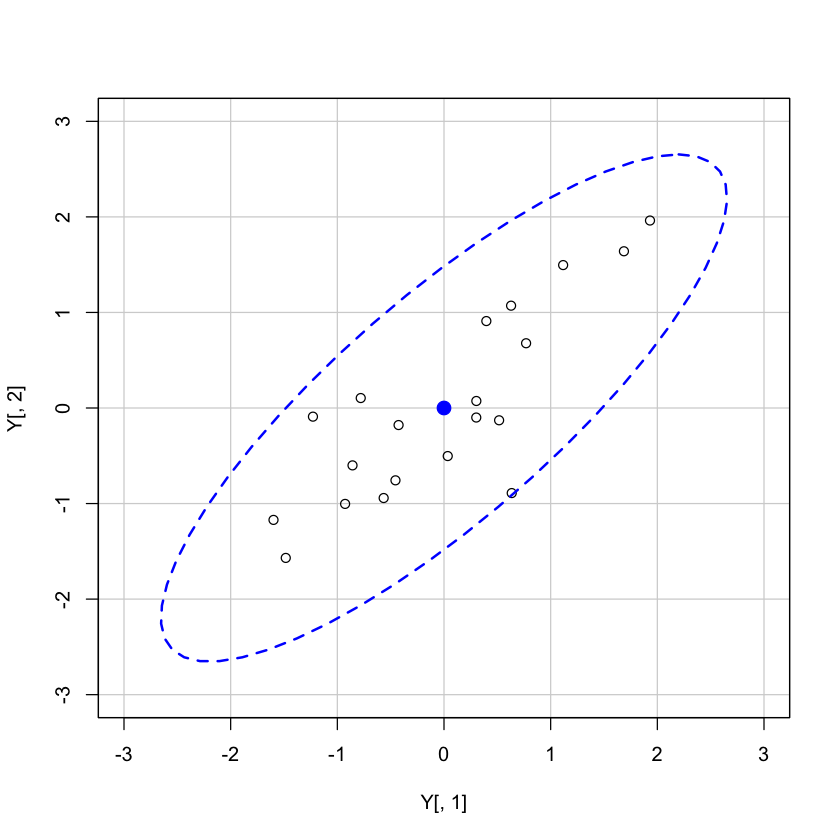

In [50]:
Y <- cbind(x, y)
car::dataEllipse(
  Y[, 1], Y[, 2],
  levels = 0.95,
  lty = 2,
  ylim = c(-3, 3),
  xlim = c(-3, 3)
)

Se racchiudiamo le osservazioni ($v_1, v_2$) con un'ellisse, allora la
lunghezza dei semiassi maggiori e minori dell'ellisse sarà proporzionale
a $\sqrt{\lambda_1}$ e $\sqrt{\lambda_2}$. L'asse maggiore è la linea
passante per il punto ($\bar{v_1}, \bar{v_2}$) nella direzione
determinata dal primo autovettore $\boldsymbol{a}_1'$ con pendenza
uguale a $a_{12}/a_{11}$. L'asse minore è la linea passante per il punto
($\bar{v_1}, \bar{v_2}$) nella direzione determinata dal secondo
autovettore $\boldsymbol{a}_2$.

Calcoliamo ora gli autovettori e gli autovalori:

In [51]:
s <- cov(Y)
ee <- eigen(s)
ee |> print()

eigen() decomposition
$values
[1] 1.8291033 0.1708967

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068



In [52]:
# First eigenvector 
ev_1 <- ee$vectors[, 1]

# Slope of the first eigenvector
ev1_m <- ev_1[2] / ev_1[1]

# Second eigenvector 
ev_2 <- ee$vectors[, 2]

# Slope of the second eigenvector
ev2_m <- ev_2[2] / ev_2[1]

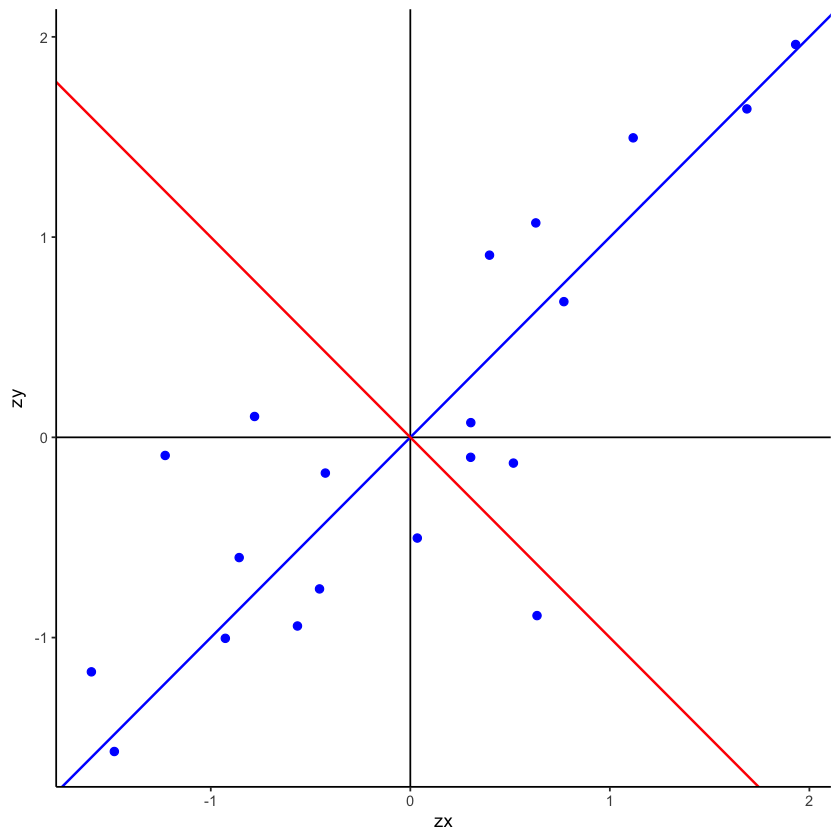

In [53]:
# Scatter plot showing the span of both eigenvectors 
data.frame(zx=scale(x), zy=scale(y))  |>
ggplot(aes(x = zx, y = zy)) +
  geom_point(color = "blue", size = 2) +
  geom_vline(xintercept = 0, linewidth = .5) +
  geom_hline(yintercept = 0, linewidth = .5) +
  geom_abline(slope = ev1_m, color = "blue", linewidth = 0.7) +
  geom_abline(slope = ev2_m, color = "red", linewidth = 0.7) +
  theme_classic()

Gli autovettori sono ortogonali:

In [54]:
# Multiply both eigenvectors 
print(ev_1 %*% ev_2)

     [,1]
[1,]    0


Per quanto riguarda gli autovalori, i loro valori numerici sono uguali alla somma dei quadrati delle distanze di ogni punto di dati proiettato sulla corrispondente componente principale. Questa somma dei quadrati è massimizzata nella prima componente principale.

Generiamo uno Scree Plot.

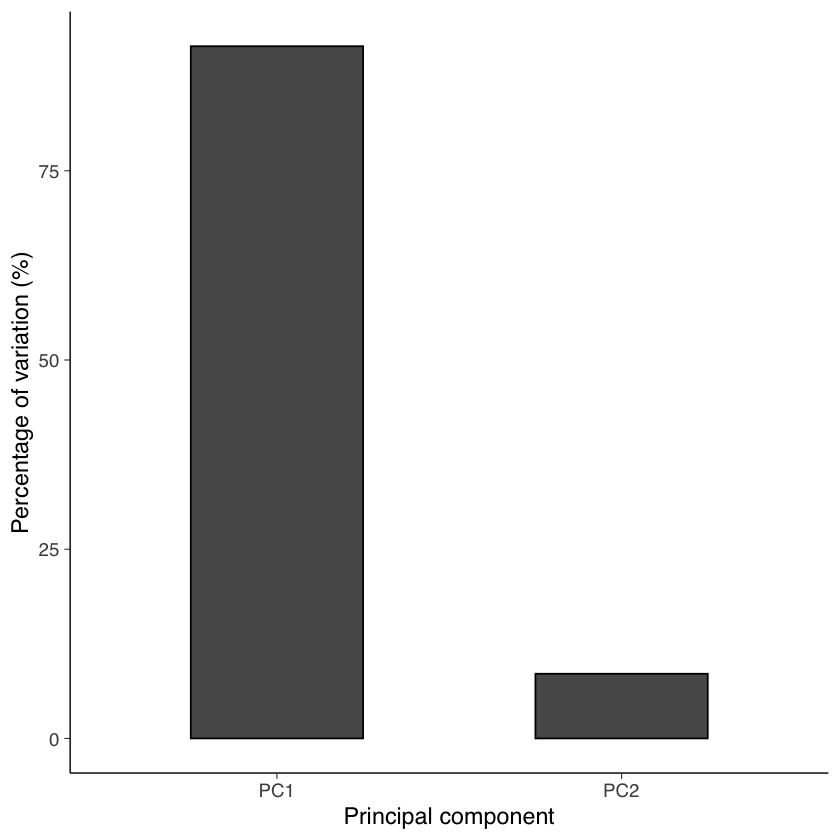

In [55]:
# Calculate the estimated variance for each eigenvalue
e_var <- ee$values / (length(x) - 1)

# Data frame with variance percentages
var_per <- tibble(
  PC  = c("PC1", "PC2"),
  PER = c(e_var) * 100 / sum(e_var) # Calculate the percentage
    )

# Scree plot 
ggplot(var_per, aes(x = PC, y = PER)) +
  geom_col(width = 0.5, color = "black") +
  xlab("Principal component") +
  ylab("Percentage of variation (%)") 

Verifichiamo che la somma degli autovalori sia uguale alla varianza totale.

In [56]:
var(x) + var(y)

[1] 2

In [57]:
ee$values |> sum()

[1] 2

Gli autovettori ottenuti utilizzando la funzione `eigen()` sono normalizzati. Ciò significa che la loro lunghezza è uguale a 1:

In [58]:
norm(as.matrix(ev_1), "FALSE")

ERROR: Error in norm(as.matrix(ev_1), "FALSE"): argument type[1]='FALSE' must be a character string of string length 1


In [98]:
norm(as.matrix(ev_2), "FALSE")

[1] 1

Utilizziamo le informazioni degli autovettori e degli autovalori per disegnare gli assi dell'ellisse: 

- gli autovettori determinano la direzione degli assi; 
- la radice quadrata degli autovalori è proporzionale alla lunghezza degli assi dell'ellisse.

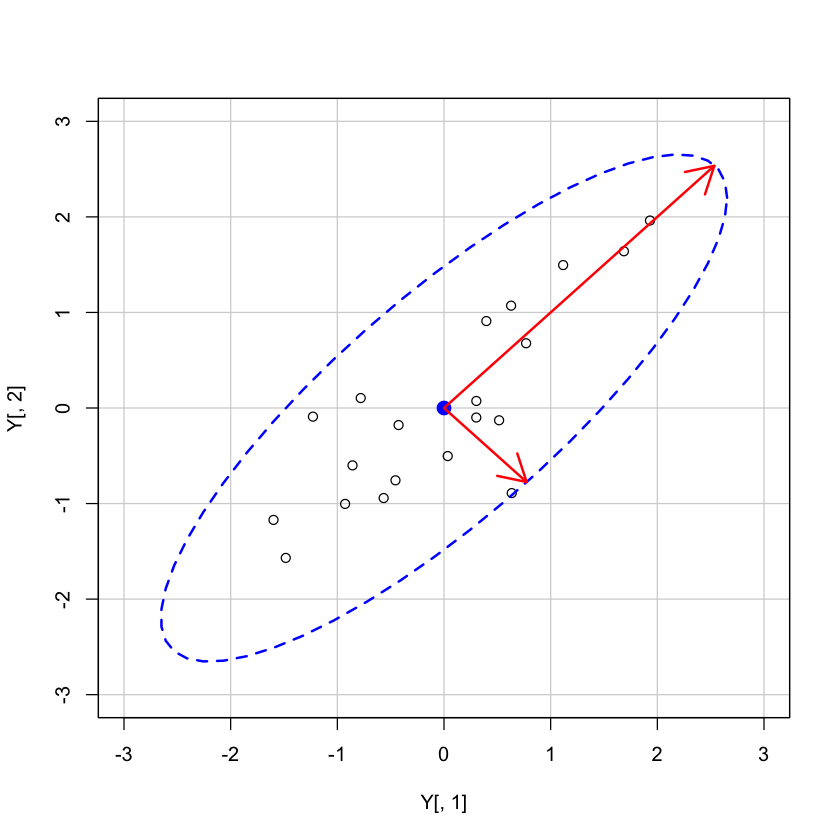

In [70]:
car::dataEllipse(
  Y[, 1], Y[, 2],
  levels = 0.95,
  lty = 2,
  ylim = c(-3, 3),
  xlim = c(-3, 3)
)
k <- 2.65
arrows(
  0, 0, 
  k * sqrt(ee$values[1]) * ee$vectors[1],
  k * sqrt(ee$values[1]) * ee$vectors[2],
  code = 2, 
  col = "red", 
  lwd = 2
)
arrows(
  0, 0, 
  k * sqrt(ee$values[2]) * ee$vectors[1],
  k * sqrt(ee$values[2]) * -ee$vectors[2],
  code = 2, 
  col = "red", 
  lwd = 2
)

Tale analisi si può estendere a qualunque numero di variabili. Per
esempio, nel caso di tre variabili, possiamo pensare di disegnare un
ellisoide attorno ad una nube di punti nello spazio tridimensionale.
Anche in questo caso, gli autovalori e gli associati autovettori
corrisponderanno agli assi dell'elissoide.

### Scomposizione spettrale di una matrice

Data una matrice quadrata e simmetrica di dimensione $n$,
$\boldsymbol{A}$, esistono una matrice diagonale $\boldsymbol{\Lambda}$
e una matrice ortogonale $\boldsymbol{V}$ tali che

$$\boldsymbol{A} =\boldsymbol{V} \boldsymbol{\Lambda} \boldsymbol{V}',$$
dove

-   $\boldsymbol{\Lambda}$ è una matrice diagonale i cui elementi sono
    gli autovalori di $\boldsymbol{A}$:
    $\boldsymbol{\Lambda} = diag(\lambda_1, \lambda_2,
        \dots, \lambda_n)$;
-   $\boldsymbol{V}$ è una matrice ortogonale le cui colonne
    $(v_1, v_2, \dots, v_p)$ sono gli autovettori di $\boldsymbol{A}$
    associati ai rispettivi autovalori.

In maniera equivalente

$$\boldsymbol{A} \boldsymbol{V} =  \boldsymbol{\Lambda} \boldsymbol{V}'.$$

Premoltiplicando entrambi i membri per $\boldsymbol{V}'$ si ottiene

$$\boldsymbol{V}'\boldsymbol{A} \boldsymbol{V} =
\boldsymbol{\Lambda},$$ 

da cui l'affermazione che la matrice degli autovettori diagonalizza $\boldsymbol{A}$.

Per esempio,

In [72]:
sigma <- matrix(
  data = c(1, 0.5, 0.5, 1.25), 
  nrow = 2, 
  ncol = 2
)
sigma |> print()

     [,1] [,2]
[1,]  1.0 0.50
[2,]  0.5 1.25


In [73]:
out <- eigen(sigma)
out |> print()

eigen() decomposition
$values
[1] 1.6403882 0.6096118

$vectors
          [,1]       [,2]
[1,] 0.6154122 -0.7882054
[2,] 0.7882054  0.6154122



In [74]:
Lambda <- diag(out$values)
Lambda |> print()

         [,1]      [,2]
[1,] 1.640388 0.0000000
[2,] 0.000000 0.6096118


In [75]:
U <- out$vectors
U |> print()

          [,1]       [,2]
[1,] 0.6154122 -0.7882054
[2,] 0.7882054  0.6154122


In [76]:
U %*% Lambda %*% t(U) |> print()

     [,1] [,2]
[1,]  1.0 0.50
[2,]  0.5 1.25


### Autovalori e determinante

Il determinante di una matrice è il prodotto degli autovalori:

$$\begin{aligned}
    |\boldsymbol{A}| &= \prod_{i=1}^{p} \lambda_i. \notag
    \end{aligned}$$

La traccia di una matrice è uguale alla somma degli autovalori:

$$\begin{aligned}
    tr(\boldsymbol{A}) &= \sum_{i=1}^{p} \lambda_i. \notag
    \end{aligned}$$

In [77]:
sigma <- matrix(data = c(1, 0.5, 0.5, 2), nrow = 2, ncol = 2)
sigma |> print()

out <- eigen(sigma)
out |> print()

     [,1] [,2]
[1,]  1.0  0.5
[2,]  0.5  2.0
eigen() decomposition
$values
[1] 2.2071068 0.7928932

$vectors
          [,1]       [,2]
[1,] 0.3826834 -0.9238795
[2,] 0.9238795  0.3826834



La traccia di una matrice è uguale alla somma degli autovalori:

In [78]:
sum(out$values) |> print()

[1] 3


Il determinante di una matrice è il prodotto degli autovalori:

In [80]:
det(sigma) |> print()
(out$values[1] * out$values[2]) |> print()

[1] 1.75
[1] 1.75


Gli autovalori di $\boldsymbol{A}^{-1}$ sono i reciproci degli
autovalori di $\boldsymbol{A}$; gli autovettori sono coincidenti.

<!--chapter:end:900_lin_alg.Rmd-->

